In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'online_shoppers_intention.csv';
df = pd.read_csv(file_path)

In [2]:


df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:


bool_columns = ['Weekend', 'Revenue']
df[bool_columns] = df[bool_columns].astype(int)

# Verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:


df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:


df["Month"] = df["Month"].replace("June", "Jun") # 'Jun' is spelt as 'June' in raw data


#  Sort by Month

In [7]:


months = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]

df["Month"] = pd.Categorical(df["Month"], categories=months, ordered=True)
df = df.sort_values("Month")


# ## Visualize data distribution

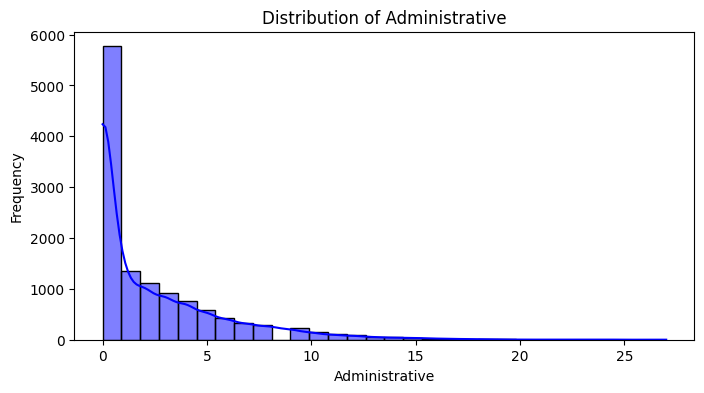

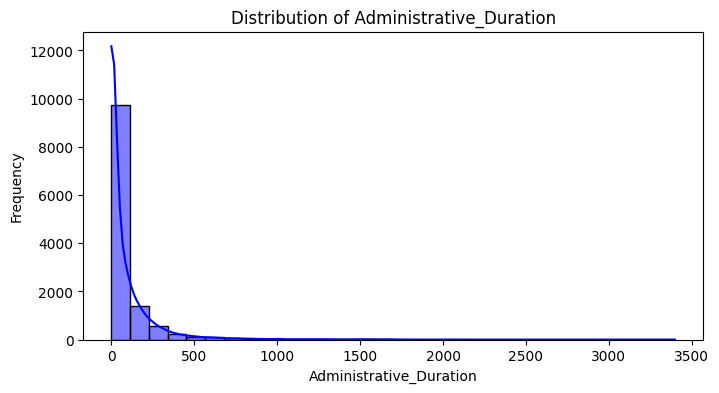

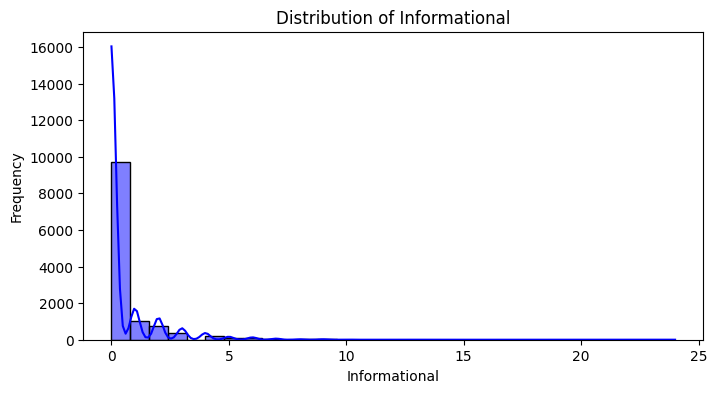

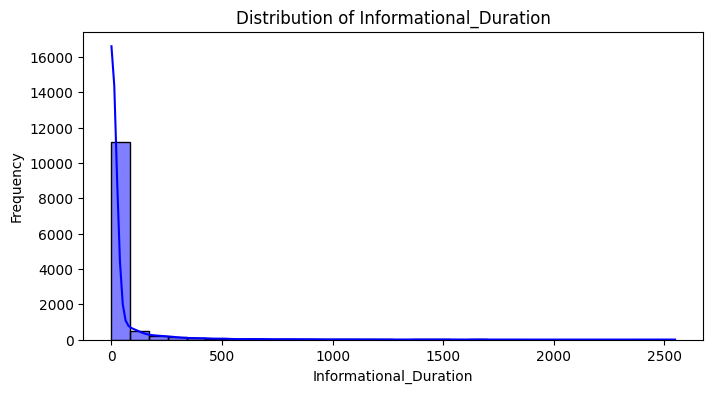

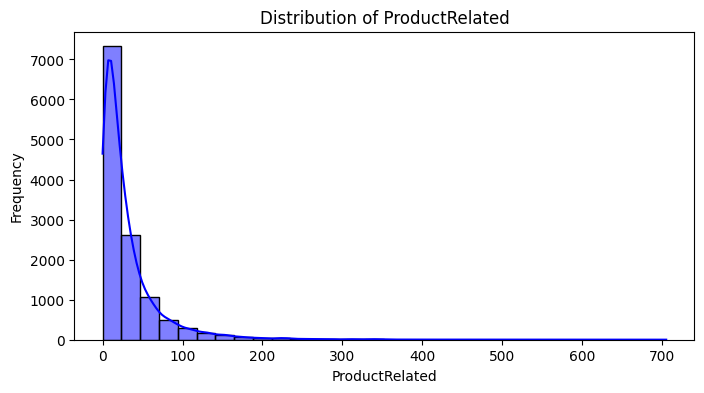

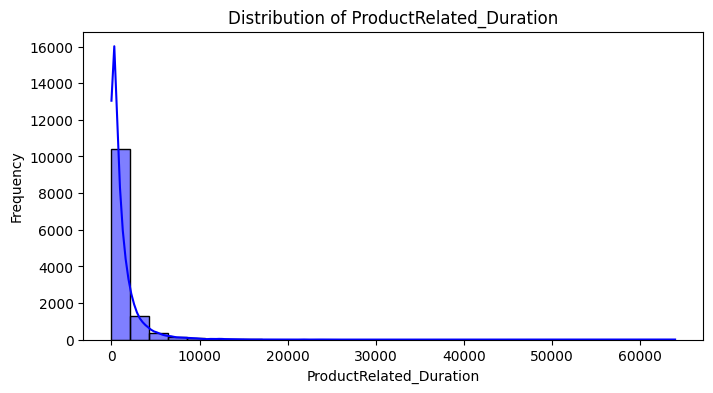

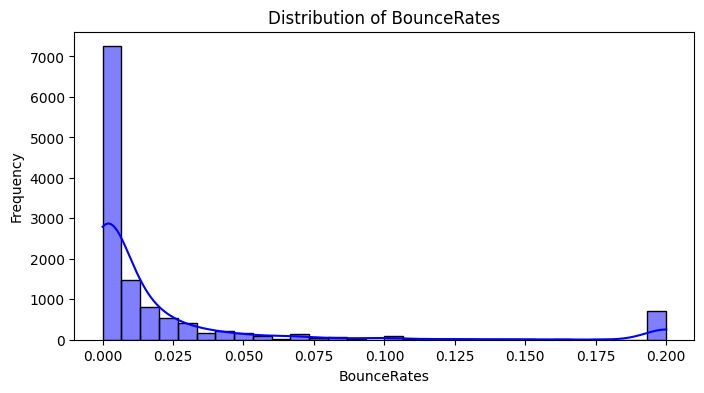

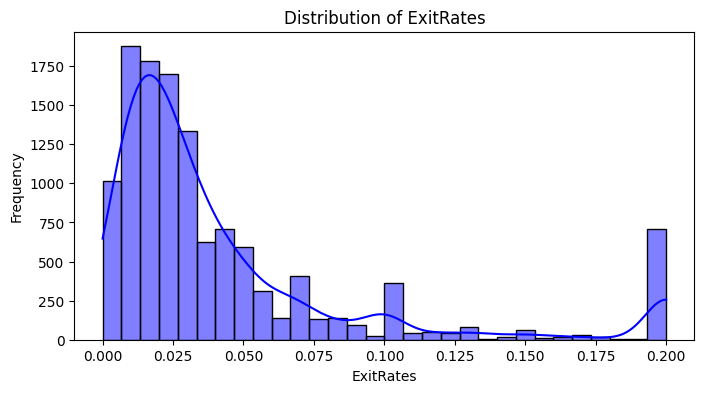

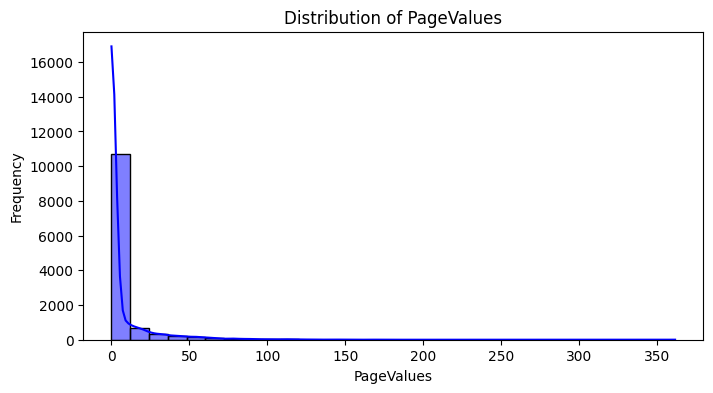

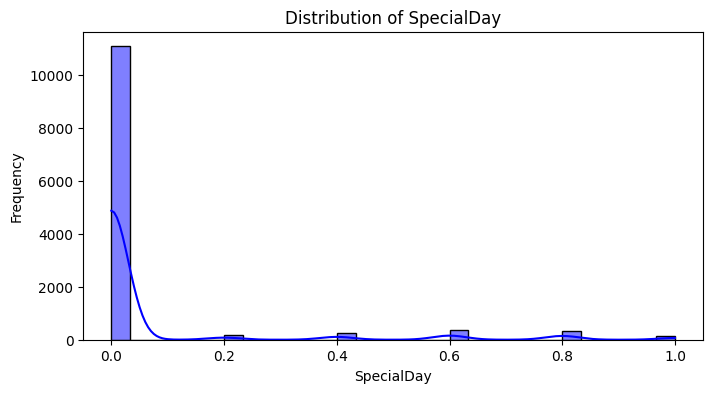

In [8]:


numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# ### Distribution of Visit by month

/tmp/ipykernel_15976/1445018916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='viridis')


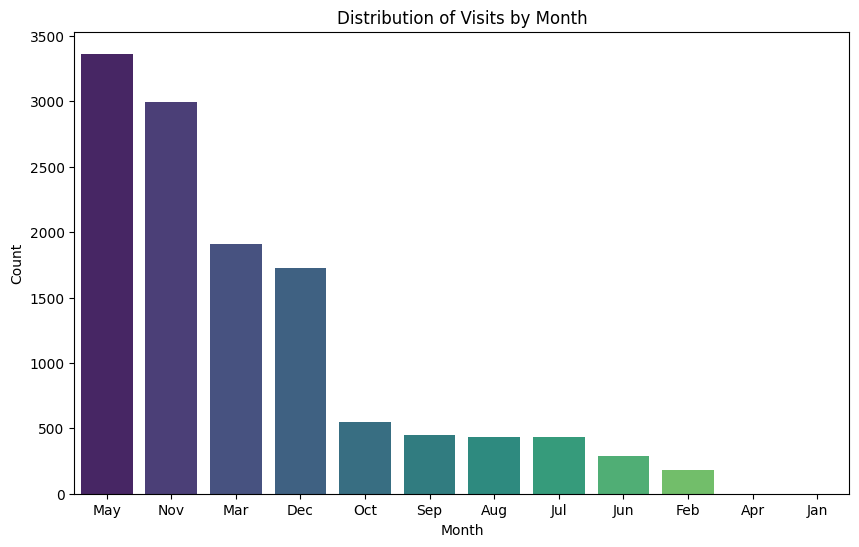

In [9]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='viridis')
plt.title('Distribution of Visits by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


# ### Distribution of the Revenue

/tmp/ipykernel_15976/155719532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='Set2')


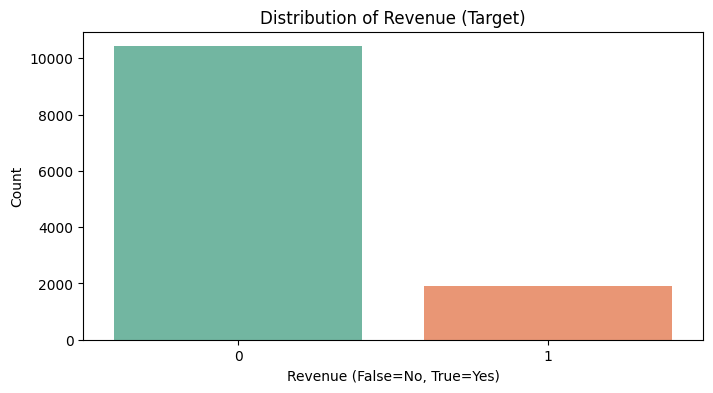

In [10]:


plt.figure(figsize=(8, 4))
sns.countplot(x='Revenue', data=df, palette='Set2')
plt.title('Distribution of Revenue (Target)')
plt.xlabel('Revenue (False=No, True=Yes)')
plt.ylabel('Count')
plt.show()


# ## Distribution of Visitor Types

/tmp/ipykernel_15976/3945625673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VisitorType', data=df, palette='coolwarm')


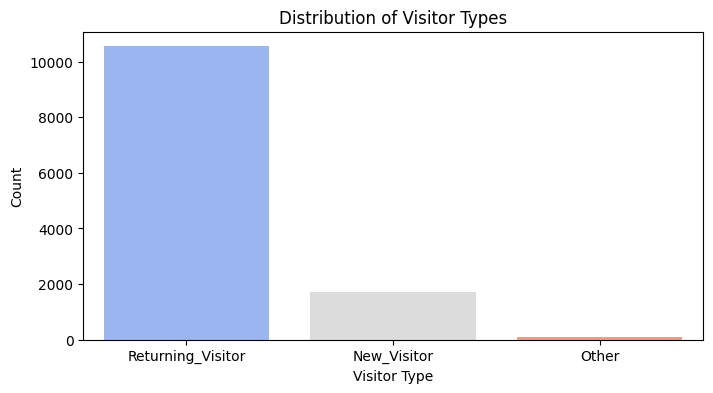

In [11]:


plt.figure(figsize=(8, 4))
sns.countplot(x='VisitorType', data=df, palette='coolwarm')
plt.title('Distribution of Visitor Types')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()


# ## Feature Engineering

In [12]:


# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corrMatrix = numeric_df.corr()

# Style the correlation matrix for visualization
corrMatrix.style.background_gradient(cmap='Blues')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [13]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


# ## Encoding the categorical column

In [14]:


# Perform one-hot encoding for categorical features: 'Month' and 'VisitorType'
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# Display the first few rows of the transformed dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.200000,0.200000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
117,0,0.0,0,0.0,11,577.0,0.018182,0.027273,0.0,0.2,...,False,False,False,False,False,False,False,False,False,True
118,0,0.0,0,0.0,8,95.0,0.000000,0.075000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
119,0,0.0,0,0.0,6,301.5,0.000000,0.111111,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
120,0,0.0,0,0.0,6,243.0,0.000000,0.033333,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [15]:


X = df.drop(columns=['Revenue'])
Y = df['Revenue'].astype(int)


# ### Check the data imbalancing

In [16]:


value_counts = Y.value_counts()
print(value_counts)


# ### Oversample the imbalance data
# 

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [17]:


ros = RandomOverSampler()
X, Y = ros.fit_resample(X, Y) # take more from the less class to increase its size

/home/minh/git_proj/myenv/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/minh/git_proj/myenv/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [18]:


value_counts = Y.value_counts()
print(value_counts)


# ## Spliting the data

Revenue
0    10422
1    10422
Name: count, dtype: int64


In [19]:


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:


# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# ## KNN classification

In [21]:


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:


y_pred = knn_model.predict(x_test)


# ## Print the matrix to see the accuracy of the model

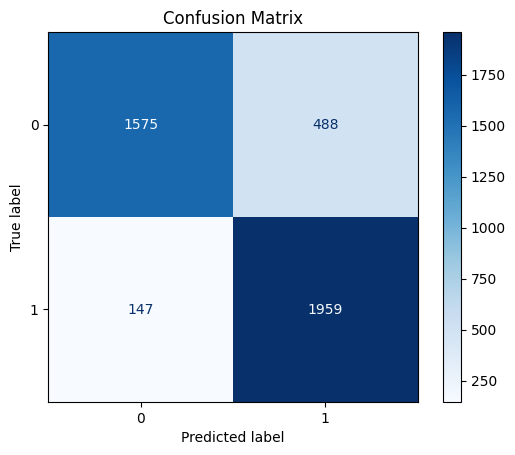

In [23]:


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# ## Evaluate the model

In [24]:


# Print the best parameters and evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


# ## KNN Model Improvement

# ### Hyperparameter tunning with Randomized Search

Confusion Matrix:
[[1575  488]
 [ 147 1959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2063
           1       0.80      0.93      0.86      2106

    accuracy                           0.85      4169
   macro avg       0.86      0.85      0.85      4169
weighted avg       0.86      0.85      0.85      4169


Accuracy: 0.8476852962341089


In [25]:


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [26]:


param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [27]:


# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a9c5c572ff0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [28]:


# Get the best parameters and best estimator
best_params = random_search.best_params_
best_knn = random_search.best_estimator_

In [29]:


# Evaluate the best model
y_pred = best_knn.predict(x_test)

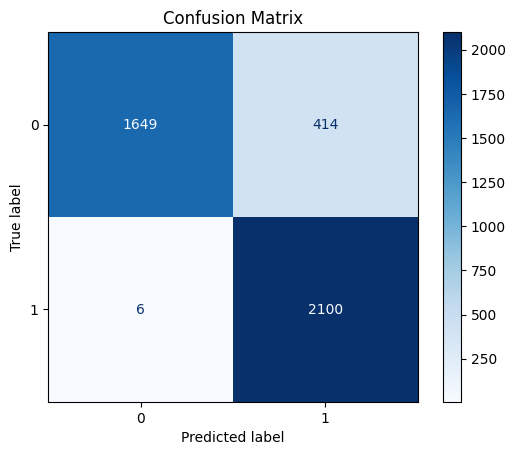

In [30]:


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [31]:


# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Confusion Matrix:
[[1649  414]
 [   6 2100]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2063
           1       0.84      1.00      0.91      2106

    accuracy                           0.90      4169
   macro avg       0.92      0.90      0.90      4169
weighted avg       0.92      0.90      0.90      4169


Accuracy: 0.8992564164068122
